# Biodiversity Portfolio Project

## Introduction

This project aims to analyze and explore the biodiversity of species in a selection of national parks. Through analysis of the conservation statuses of the species, we will investigate if there are any common themes to the types of species that become endangered. Two datasets, `observations.csv` and `species_info.csv` will be used in this project.

The data will be cleaned up, explored, analysed and then plotted with the goal of answering the questions below:

##### **Questions**:
 - What does the distribution of endangered species look like across the parks?
 - What proportion of the species in each category are endangered and what proportion are not?
 - Which category has the most endangered species, and are some species more likely to be endangered than others?

This data was sourced from the National Parks Service.

## Section A: Preparing and Previewing Data

For the first part of this project, the datasets must be loaded into dataframes for later analysis. We will also preview some aspects of the two dataframes before we starting to explore the dataframes.

### Loading in data

#### Step 1: Importing **Python** libraries

First, we import the **Python** libraries needed for this project.

In [119]:
# Importing the python libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

 #### Step 2: Loading in the datasets

Then the datasets from the two **`.csv`** files can be loaded into `DataFrames` and saved to concise variables. 

In [120]:
# Loading in the data

observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

### Previewing Dataframes

 #### Step 3: Previewing the data

Once the data is loaded in, the columns in each dataframe can be previewed using `.head()`.

In [121]:
# Previewing the data for species

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [122]:
# Previewing the data for observations

observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Some further information on the columns of the two dataframes is given below:

##### species: 
 - `category` - the classification of the species by category
 - `scientific_name` - the scientific or latin name for each species
 - `common_names` - common names for each species
 - `conservation_status` - the conservation status of the species

##### observations:
 - `scientific_name` - the scientific or latin name for each species
 - `park_name` - the name of the national park where the observations were made
 - `observations` - the number of observations of the species made over the past week

## Section B: Exploring and Cleaning Data

In this second part of the project, we now begin to explore the data in depth and clean up any columns that require it.

### EDA (Exploratory Data Analysis)

 #### Step 4: Exploring the data

Now we can take a look at some summary statistics of the data in the dataframes using `.describe()` and `.info`.

#### Species

We will first take a look at the `species` dataframe.

In [123]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Procyon lotor,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


The `.describe()` method allows us to see the overall count of entries in `species` as well as the number of unique values. The most frequently occurring data for each column is also displayed along with how many times it appears in the dataframe. 

From this, we can see that most of the species appear to fall into the 'Vascular Plant' category. It is also worth noting that there are four conservation statuses in the `species` dataframe. We can display them using the code below.

In [124]:
species['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

The presence of `nan` in the code above tells us that there are species with no recorded conservation status in the `species` dataframe.

In [125]:
print(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


By using `.info`, we can find out the dimensions of the `species` dataframe and see which columns are missing values. Since there are 5824 rows of data in the dataframe but only 191 non-null rows in the conservation_status column, we can see that the majority of the values are missing. This can be investigated later on in the project.

#### Observations

We can then take a look at the `observations` dataframe.

In [126]:
observations.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Puma concolor,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


By using the `.describe()` method on the `observations` dataframe, we can see some summary statistics on the numerical data in the `'observations'` column. The maximum observations of any one species is 321 and the minimum is 9. 

We can also see the number of unique values in each of the other columns as well as the most frequently occurring data entries. There are 4 unique national parks recorded in the `observations` dataframe, with the most frequently occurring park being the `'Great Smoky Mountains National Park'`. Using the code below, we can display the names of all the national parks in the column.

In [127]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [128]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


Next, by using `.info`, we can see that there are 23296 rows in the `observations` dataframe. There do not seem to be any missing values at first glance. We can also note that the data type of the `observations` column is `int64` while the others are of the `object` data type.

### Cleaning columns

 #### Step 5: Cleaning the data

As the last step revealed, the `scientific_name` column in the `species` dataset has duplicate values, and the `conservation_status` column has many missing values. These columns need to be cleaned before any analysis can be made.

For the `scientific_name` column in the `species` dataset it would make sense to drop the duplicate rows and keep only the most recent information, since the duplicate names are irrelevant to our analysis, but the conservation status is relevant. 

For the `conservation_status` column, the missing values represent the species that are not endangered. Therefore the `NaN` values can be replaced with a suitable label, in this case `'Species of Least Concern'`.

In [129]:
# Replacing NaN values

species = species.fillna(value='Species of Least Concern')

# Checking the changes

species['conservation_status'].unique()

array(['Species of Least Concern', 'Species of Concern', 'Endangered',
       'Threatened', 'In Recovery'], dtype=object)

In [130]:
# Dropping duplicates in the species dataframe

species = species.drop_duplicates(subset ='scientific_name', keep ='last')

# Checking the changes 
species.describe()

,category,scientific_name,common_names,conservation_status
count,5541,5541,5541,5541
unique,7,5541,5231,5
top,Vascular Plant,Clethrionomys gapperi gapperi,Dicranum Moss,Species of Least Concern
freq,4262,1,7,5362


After checking to see that there are no more rows with duplicate scientific names, we can see that the count of unique common names is still less than the full count in the `common_names` column. We can investigate this by taking a closer look at the most frequent common name, `'Dicranum Moss'`, using the code below.

In [131]:
# Filtering the species data for rows with the common name 'Dicranum Moss'

dicr_moss = species[species['common_names'] == 'Dicranum Moss']

print(dicr_moss)

               category      scientific_name   common_names  \
2737  Nonvascular Plant  Dicranum flagellare  Dicranum Moss   
2738  Nonvascular Plant      Dicranum fulvum  Dicranum Moss   
2739  Nonvascular Plant  Dicranum fuscescens  Dicranum Moss   
2741  Nonvascular Plant   Dicranum polysetum  Dicranum Moss   
2742  Nonvascular Plant   Dicranum scoparium  Dicranum Moss   
2743  Nonvascular Plant     Dicranum spurium  Dicranum Moss   
2745  Nonvascular Plant      Dicranum viride  Dicranum Moss   

           conservation_status  
2737  Species of Least Concern  
2738  Species of Least Concern  
2739  Species of Least Concern  
2741  Species of Least Concern  
2742  Species of Least Concern  
2743  Species of Least Concern  
2745  Species of Least Concern  


We can see that the seven occurences of species with the common name `'Dicranum Moss'` all have different scientific names. This explains the difference in unique and total counts of common names in the `common_name` column, therefore no changes need to be made to this column.

### Merging

 #### Step 6: Merging the dataframes

Now that the data has been cleaned, it is possible to merge the two dataframes on the `'scientific_name'` column. This will combine the information from the two and make it easier to graph data for visualisation.

In this case, we will use the **pandas** `.merge()` function to perform an inner merge of `species` and `observations`. The merged dataframe will be assigned to the variable `species_obsv`.

In [132]:
# Merging the dataframes

species_obsv = observations.merge(species, how='inner', left_on='scientific_name', right_on='scientific_name')

# Previewing the merged dataframe

species_obsv.describe(include='all')

,scientific_name,park_name,observations,category,common_names,conservation_status
count,23296,23296,23296.000000,23296,23296,23296
unique,5541,4,NaN,7,5231,5
top,Puma concolor,Great Smoky Mountains National Park,NaN,Vascular Plant,Dicranum Moss,Species of Least Concern
freq,12,5824,NaN,17880,28,22528
mean,NaN,NaN,142.287904,NaN,NaN,NaN
std,NaN,NaN,69.890532,NaN,NaN,NaN
min,NaN,NaN,9.000000,NaN,NaN,NaN
25%,NaN,NaN,86.000000,NaN,NaN,NaN
50%,NaN,NaN,124.000000,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,NaN,NaN


In [133]:
# Previewing the merged dataframe

species_obsv.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Species of Least Concern
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Species of Least Concern
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Species of Least Concern
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Species of Least Concern
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Species of Least Concern


The data is previewed one last time to check that the merged dataframe is clean. The combined data is now ready for analysis.

## Section C: Analysis and Interpretation

For the third part of this project, we will begin the analysis of the cleaned and merged data. We will then interpret the data to try and answer the questions posed in the introfuction. As a reminder, the questions we will be investigating are displayed below:
 * What does the distribution of endangered species look like across the parks?
 * What proportion of the species in each category are endangered and what proportion are not?
 * Which category has the most endangered species, and are some species more likely to be endangered than others?

To begin with, the distribution of endangered species across the four parks can be plotted onto a stacked bar chart.

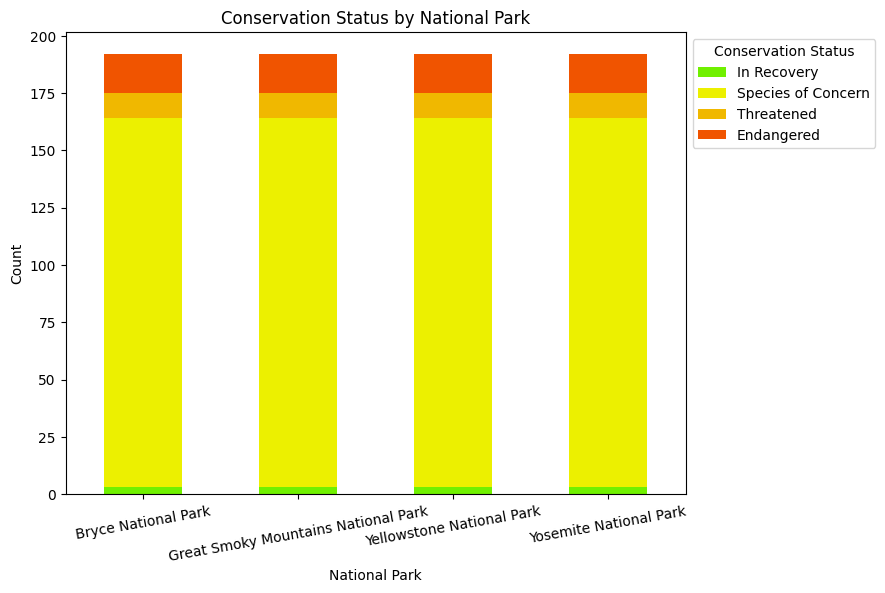

In [141]:
# Group data by park_name

by_park = species_obsv.groupby('park_name')[['conservation_status', 'park_name']].value_counts().unstack().fillna(0).astype(int)

# Drop the 'species of least concern' group and reorder columns

status_by_park = by_park.drop(columns='Species of Least Concern')
status_order = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']
status_by_park = status_by_park[status_order]
status_by_park.head()

# Plot stacked bar chart and save figure

status_by_park.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#70F000','#ECF000','#F0B800','#F05400'])
plt.title('Conservation Status by National Park')
plt.xlabel('National Park')
plt.ylabel('Count')
plt.legend(title='Conservation Status', bbox_to_anchor=(1, 1), loc='upper left')
plt.set_cmap('plasma')
plt.tick_params(axis = 'x', labelrotation = 10)
plt.savefig('ConservationStatusByParkStacked.png', bbox_inches='tight')
plt.show()